In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from relation_extractor import RelationExtractor
from knowledge_graph_generator import KnowledgeGraphGenerator

In [2]:
# RelationExtractor example
extractor = RelationExtractor("Gone with the Wind", "This movie was horrible.  It was old and had a lot of racism and it was shot in Georgia.")
print(extractor.relations)

[('Gone with the Wind', 'hasLOCTheme', 'Georgia')]


In [2]:
# KnowledgeGraphGenerator example for the best movie of all time, Top Gun. 
# This method has a massive time complexity that could definitely be improved.
full_review_df = pd.read_csv("data/review_df.csv")
review_df = full_review_df.loc[full_review_df["entity_id"] == "m/top_gun"] \
    .reset_index(drop=True)
full_known_df = pd.read_csv("data/known_df.csv")
known_df = full_known_df.loc[full_known_df["entity_id"] == "m/top_gun"] \
    .reset_index(drop=True)
generator = KnowledgeGraphGenerator(
    input_data_list=[review_df],
    known_data_list=[known_df]
)
kg_df = generator.knowledge_graph_df \
    .drop_duplicates() \
    .reset_index(drop = True)

In [3]:
kg = nx.DiGraph()
kg.add_node(kg_df["entity_id"].unique()[0])
for i in range(len(kg_df)):
    kg.add_node(kg_df.iloc[i]["value"])
    kg.add_edge(
        kg_df["entity_id"].unique()[0],
        kg_df.iloc[i]["value"]
    )

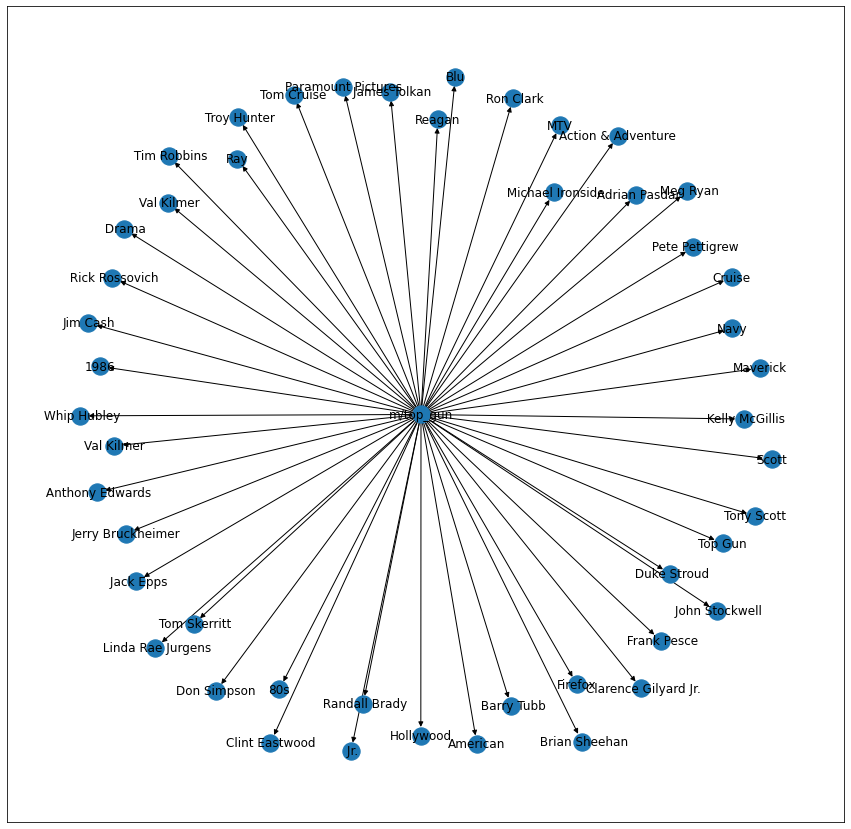

In [8]:
plt.figure(figsize=(15,15))
nx.draw_networkx(kg)
plt.show()